# Student Performance Indicator

## Life cycle of ML Project

### - Understanding the problem statement
### - Data Collection
### - Data Checks to perform
### - EDA
### - Data Pre-processing
### - Model Training
### - Choose the best model

## 1) Problem Statement
### - This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test prep course.

## 2) Data Collection
### - Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
### - Dataset shape: 1000 x 8

## 2.1 Import data and reqd packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\Datasets to Practice\StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

### Dataset info:
#### Gender: Male or Female
#### race/ethnicity: Group A, B, C, D, E, F
#### parental level of education: "bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'
#### lunch: 'standard', 'free/reduced'
#### test preparation course: None or Completed
#### math score
#### reading score
#### writing score

# In Data Analysis we will analyze to find the below stuff

1. Missing values
2. Duplicates
3. Datatype
4. No. of unique values in each column
5. Stats of dataset
6. Various categories present in the different categorical column

In [6]:
# Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
#Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#Checking No. of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#Stats of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights:
- All means are very close to each other - between 66.08 to 69.16
- All std deviations are also close - 14.6 to 15.19
- Math score minimum is 0

In [11]:
print("Categories in 'gender' are: {}".format(df['gender'].unique()))
print("Categories in 'race/ethnicity' are: {}".format(df['race/ethnicity'].unique()))
print("Categories in 'parental level of education' are: {}".format(df['parental level of education'].unique()))
print("Categories in 'lunch' are: {}".format(df['lunch'].unique()))
print("Categories in 'test preparation course' are: {}".format(df['test preparation course'].unique()))

Categories in 'gender' are: ['female' 'male']
Categories in 'race/ethnicity' are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' are: ['standard' 'free/reduced']
Categories in 'test preparation course' are: ['none' 'completed']


In [12]:
#defining numerical and categorical features

numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']

print("We have {} numerical features {}\n".format(len(numerical_features),numerical_features))
print("We have {} categorical features {}".format(len(categorical_features),categorical_features))

We have 3 numerical features ['math score', 'reading score', 'writing score']

We have 5 categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df['Total Score']=df['math score'] + df['reading score'] + df['writing score']
df['Average']=df['Total Score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()

print('Number of students with full marks in Maths: {}'.format(math_full))
print('Number of students with full marks in Reading: {}'.format(reading_full))
print('Number of students with full marks in Writing: {}'.format(writing_full))

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [15]:
reading_less_20=df[df['reading score'] <= 20]['Average'].count()
math_less_20=df[df['math score'] <= 20]['Average'].count()
writing_less_20=df[df['writing score'] <= 20]['Average'].count()

print('Number of students with less than 20 marks in Maths: {}'.format(math_less_20))
print('Number of students with less than 20 marks in Reading: {}'.format(reading_less_20))
print('Number of students with less than 20 marks in Writing: {}'.format(writing_less_20))

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


### Insights:
- Students have worst performed in Math
- Best performance noted in Reading subject

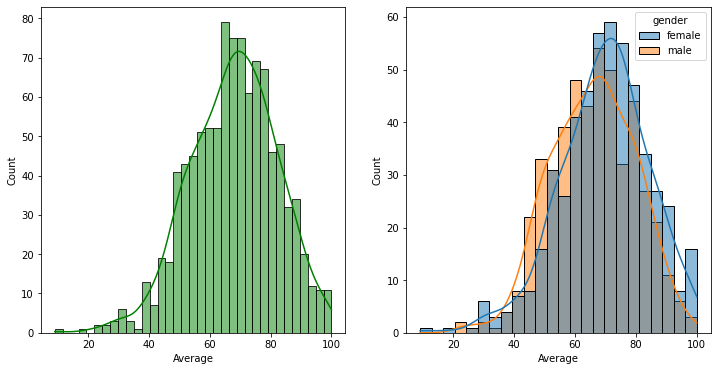

In [16]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=35,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

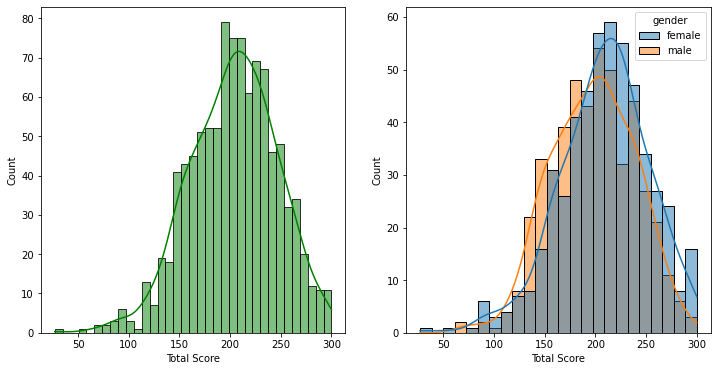

In [17]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=35,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

#### Female students tend to perform better than male students

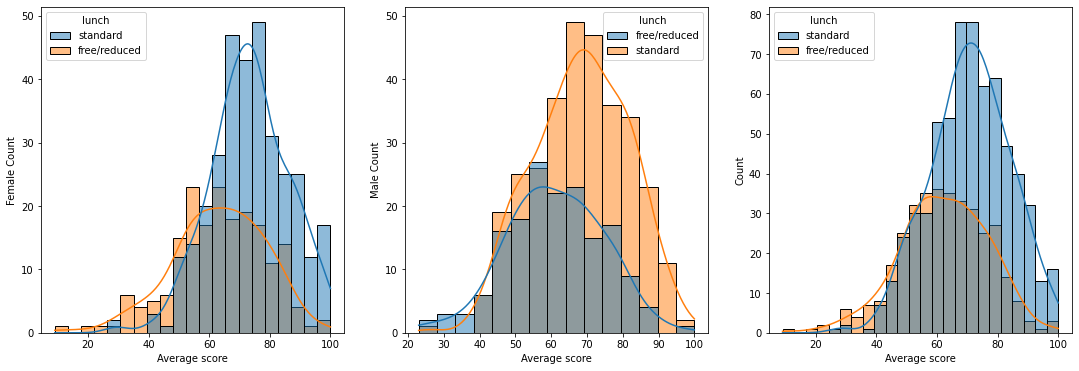

In [18]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.xlabel('Average score')
plt.ylabel('Female Count')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.xlabel('Average score')
plt.ylabel('Male Count')
plt.subplot(143)
plt.xlabel('Average score')
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.show()

#### Insights:
- Standard lunch helps Female and Male students to score good marks
- Overall standard lunch helps students to score well

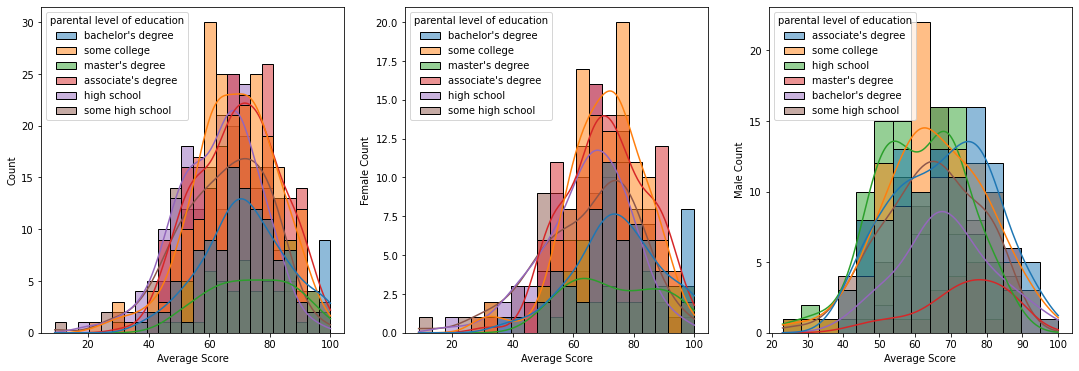

In [19]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.xlabel('Average Score')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Average Score')
plt.ylabel('Female Count') 
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Average Score')
plt.ylabel('Male Count')             
plt.show()             

#### Insights:
- Parents with Associate's Degree or some college degree for Male students tend to perform well.
- Parents with Some College Degree for Female students tend to perform the nearly 60-80 marks.

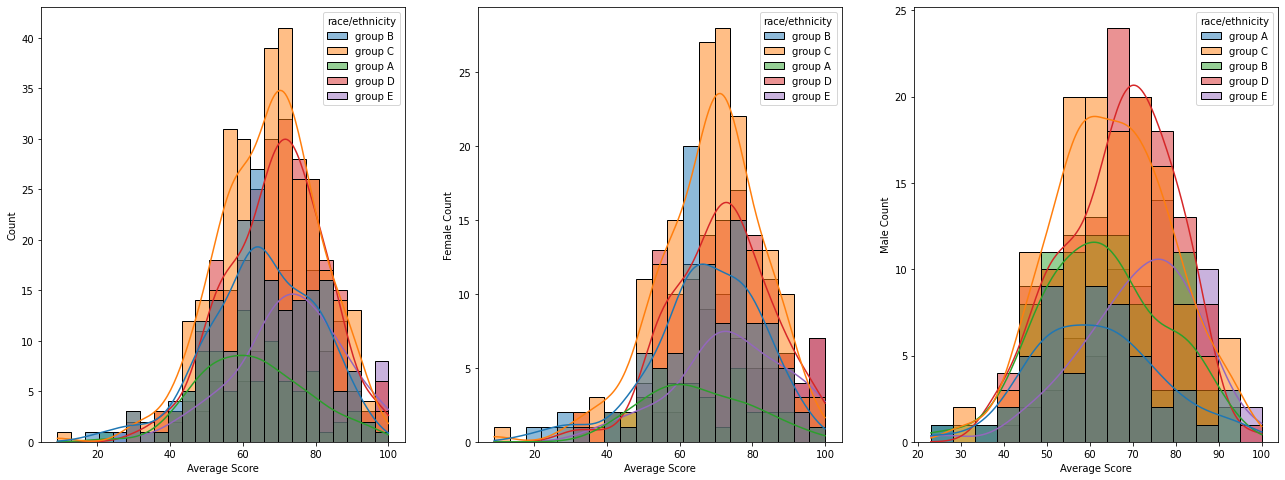

In [20]:
fig,axs=plt.subplots(1,3,figsize=(30,8))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Average Score')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Average Score')
plt.ylabel('Female Count') 
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Average Score')
plt.ylabel('Male Count')             
plt.show()   

#### Insights:
- Group A and Group E tend to perform poorly in exam whereas Group B performs the best irrespective of gender.
- Group D performs the best in context of Male students and Group C is second best. Poor performance was recorded for Group A as discussed.
- Group C performs the best in context of Female students and Group D is second best. Poor performance was recorded for Group A.

<AxesSubplot:ylabel='writing score'>

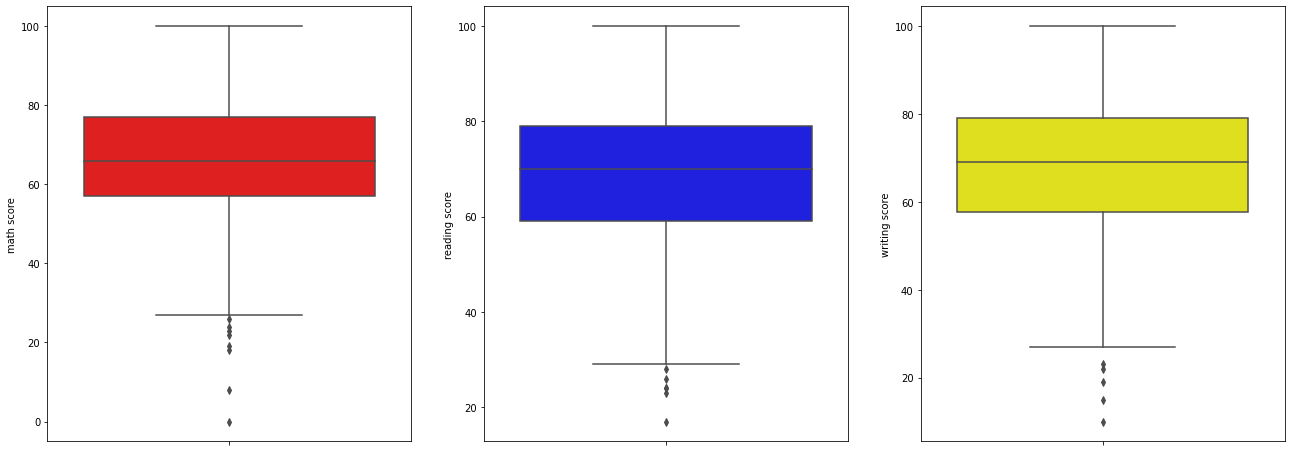

In [21]:
fig,axs=plt.subplots(1,3,figsize=(30,8))
plt.subplot(1,4,1)
sns.boxplot(y='math score',data=df,color='red')
plt.subplot(1,4,2)
sns.boxplot(y='reading score',data=df,color='blue')
plt.subplot(1,4,3)
sns.boxplot(y='writing score',data=df,color='yellow')
#Can also be done with Violin plot for better viz.

#### Insights:
- Nearly 58-78 is the score for students in Math.
- Nearly 59-79 is the score for students in Reading.
- Nearly 56-79 is the score for students in Writing.

### Multivariate Analysis using pieplot

<function matplotlib.pyplot.show(close=None, block=None)>

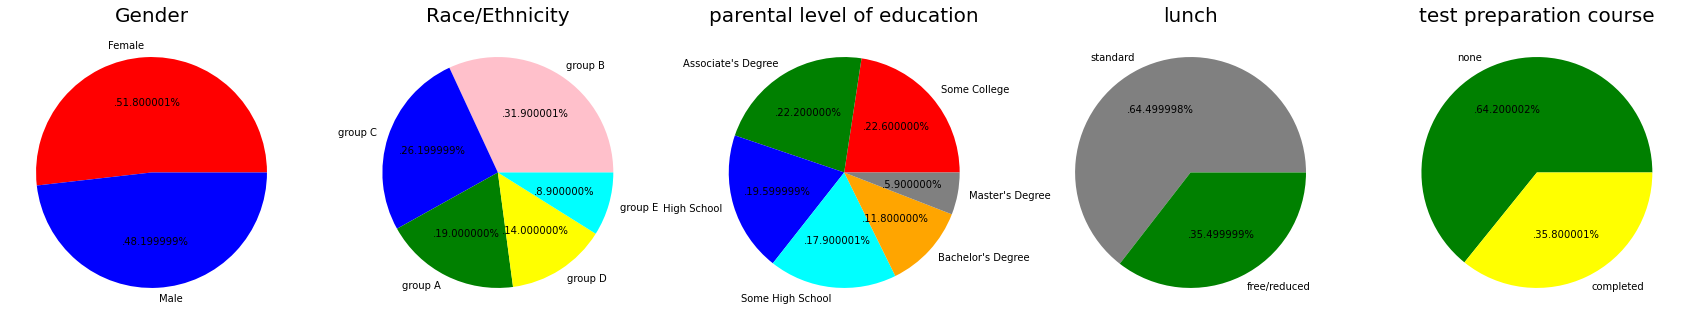

In [29]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['Female', 'Male']
color=['red','blue']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)    
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels=['group B' ,'group C' ,'group A' ,'group D' ,'group E']
color=['pink','blue','green','yellow','cyan']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental level of education',fontsize=20)


plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard', 'free/reduced']
color=['grey','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20) 
plt.axis('off')

plt.subplot(1,5,5)
size=df['test preparation course'].value_counts()
labels=['none' ,'completed']
color=['green','yellow']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test preparation course',fontsize=20) 
plt.axis('off')

plt.show



#### Insights:
- Number of male and female students are almost equal.
- Students are more in Group B and lowest in Group E.
- Parental level of education is almost similar for 'some college' and "Associate's degree".
- Standard lunch is most preferred by students.
- Majority students didn't prefer any test preparation courses.

## Univariate Anaylysis

### How is Gender feature's distribution over itself?

([<matplotlib.patches.Wedge at 0x1ae88b9c850>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06217041096298411, -1.0982417038160106, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.800001%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.199999%')])

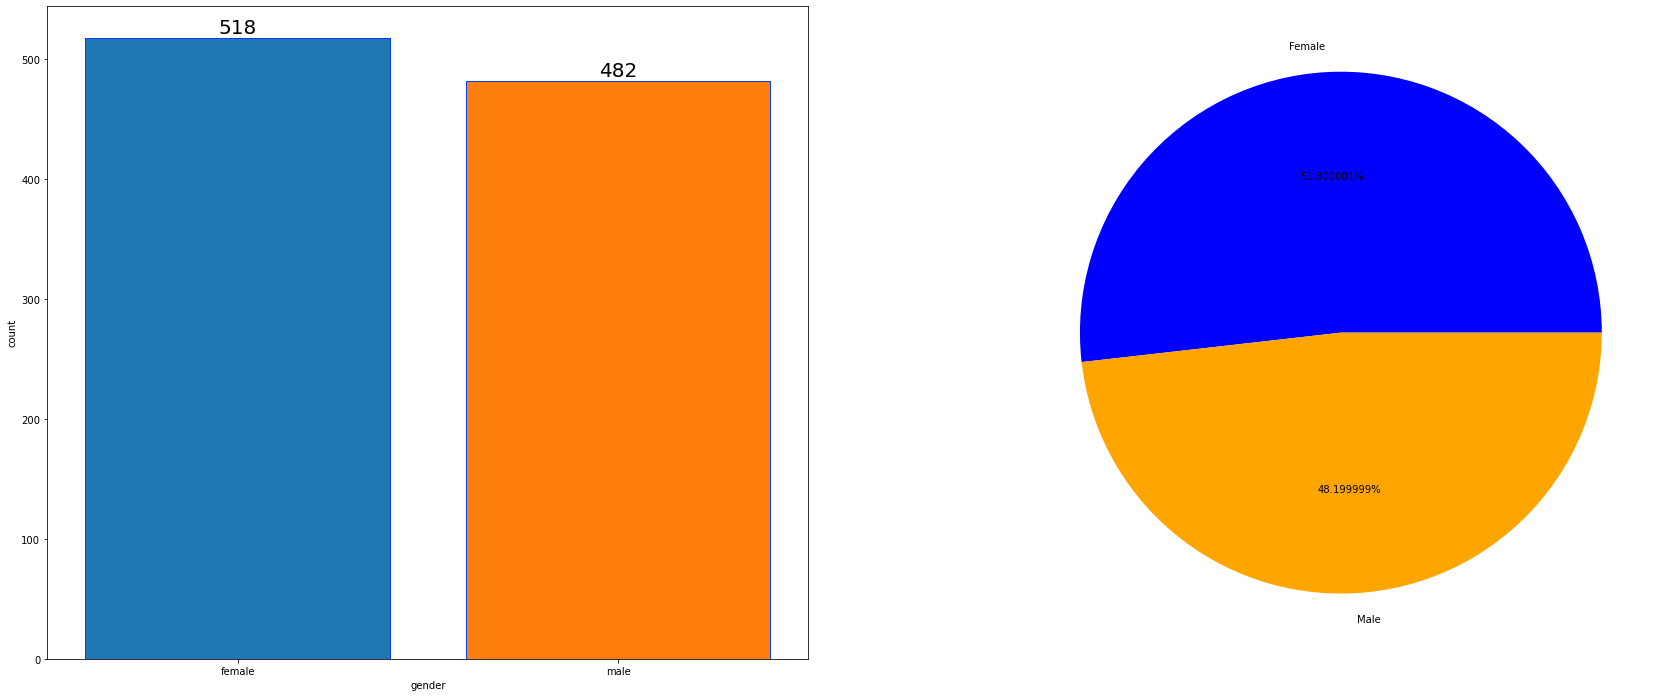

In [108]:
fig,ax=plt.subplots(1,2)

plt.subplot(121)
sns.countplot(x=df['gender'],data=df,edgecolor=sns.color_palette("bright", 1),saturation=1)
abs_values = df['gender'].value_counts(ascending=False).values
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
size=df['gender'].value_counts()
labels=['Female', 'Male']
color=['blue','orange']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')

#### Insights: 
- Female students are 51.8%(518) and male students are 48.199%(482)

### Bivariate Analysis

#### Does Gender have any impact on Student's Performance?

In [75]:
gender_group=df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [153]:
import scipy.stats as stats
male_df=df[df.gender=='male']
female_df=df[df.gender=='female']
t, p = stats.ttest_ind(male_df['Average'], female_df['Average'], equal_var=False)
print('t-value:', t)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis, Gender has an impact on student performance')
else:
    print('Fail to reject null hypothesis, Gender has no impact on student performance')

t-value: -4.17888598340718
p-value: 3.1861975638752864e-05
Reject null hypothesis, Gender has an impact on student performance


##### Gender has an impact on student performance at 95% Confidence Interval.

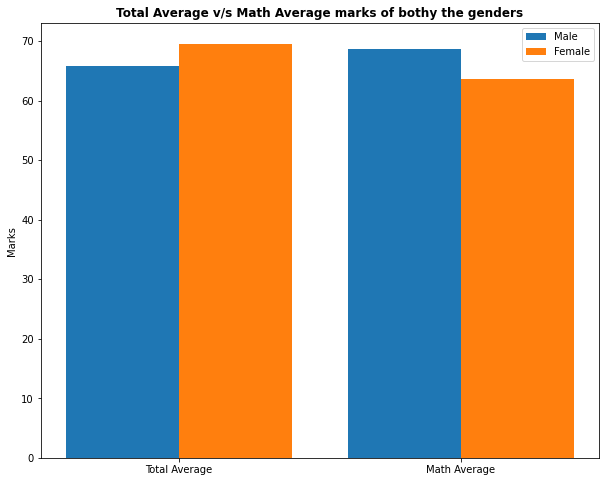

In [118]:
plt.figure(figsize=(10,8))
X=['Total Average','Math Average']
female_scores=[gender_group['Average'][0],gender_group['math score'][0]]
male_scores=[gender_group['Average'][1],gender_group['math score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total Average v/s Math Average marks of bothy the genders',fontweight='bold')
plt.legend()
plt.show()

#### Insights:
- On an avg Females have a better score than overall men.
- Whereas Males have scored higher in Maths.

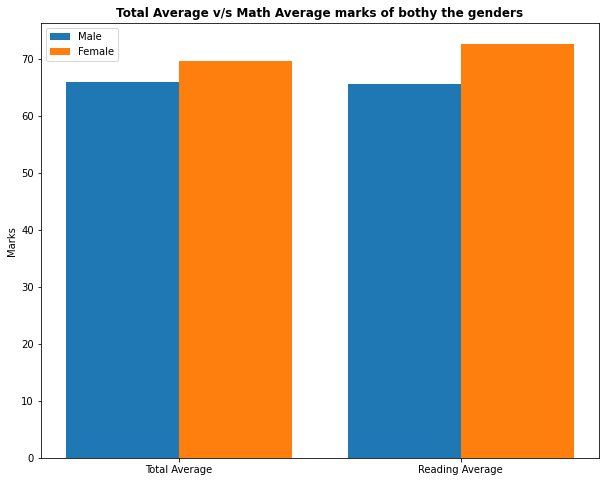

In [120]:
plt.figure(figsize=(10,8))
X=['Total Average','Reading Average']
female_scores=[gender_group['Average'][0],gender_group['reading score'][0]]
male_scores=[gender_group['Average'][1],gender_group['reading score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total Average v/s Math Average marks of bothy the genders',fontweight='bold')
plt.legend()
plt.show()

#### Insights:
- On an avg Females have a better score than overall men.
- Whereas Females have scored higher in Maths.

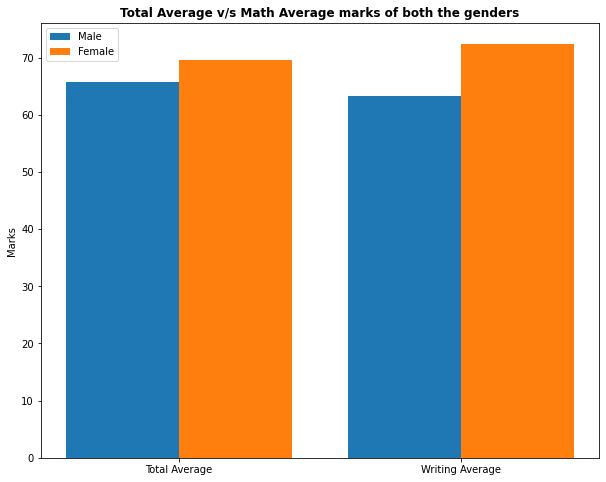

In [123]:
plt.figure(figsize=(10,8))
X=['Total Average','Writing Average']
female_scores=[gender_group['Average'][0],gender_group['writing score'][0]]
male_scores=[gender_group['Average'][1],gender_group['writing score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total Average v/s Math Average marks of both the genders',fontweight='bold')
plt.legend()
plt.show()

#### Insights:
- On an avg Females have a better score than overall men.
- Whereas Females have scored higher in Writing.

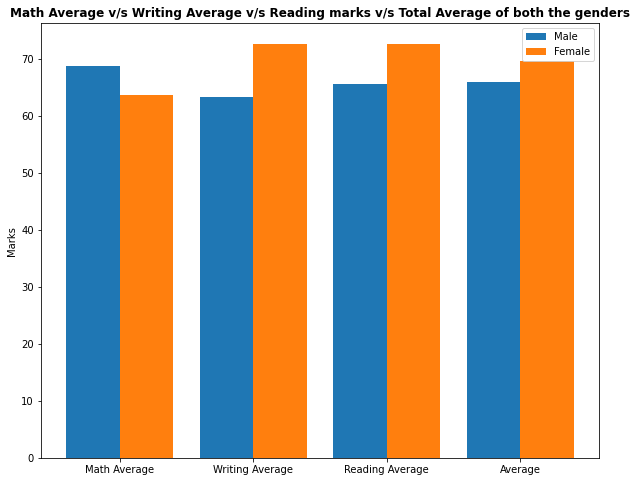

In [127]:
plt.figure(figsize=(10,8))
X=['Math Average','Writing Average', 'Reading Average','Average']
female_scores=[gender_group['math score'][0],gender_group['writing score'][0],gender_group['reading score'][0],gender_group['Average'][0]]
male_scores=[gender_group['math score'][1],gender_group['writing score'][1],gender_group['reading score'][1],gender_group['Average'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Math Average v/s Writing Average v/s Reading marks v/s Total Average of both the genders',fontweight='bold')
plt.legend()
plt.show()

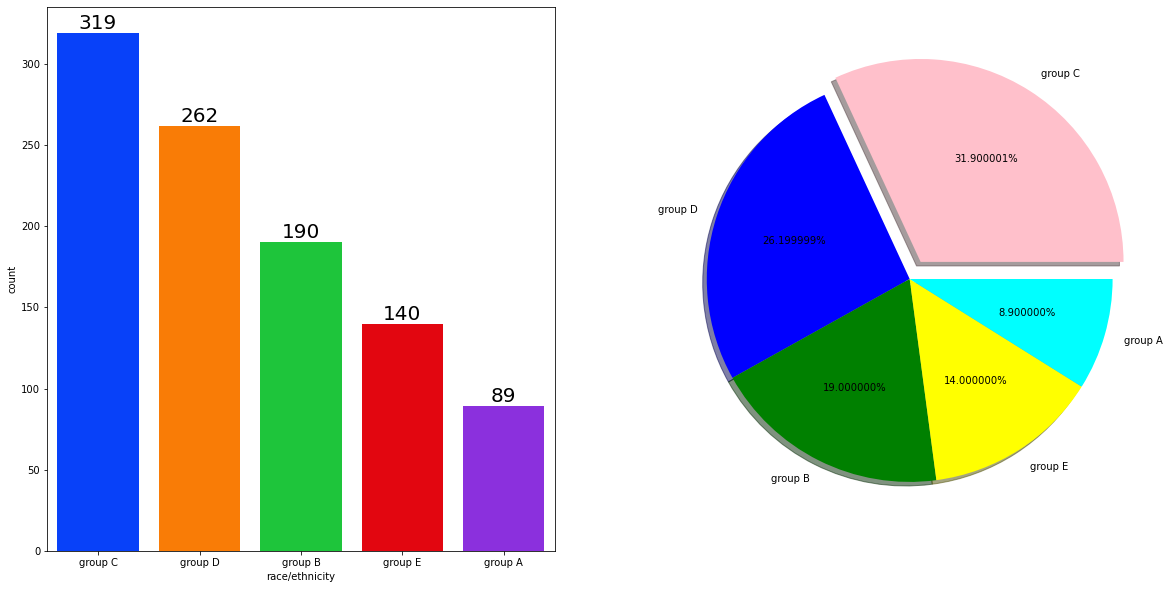

In [150]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',order=['group C','group D','group B','group E','group A'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

size=df['race/ethnicity'].value_counts()
labels=['group C','group D','group B','group E','group A']
color=['pink','blue','green','yellow','cyan']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%',explode=(.1,0,0,0,0),shadow=True)
plt.show()

#### Insights:
- Majority of students are from Group C(319) and Group D(262)
- Lowest number of students are from Group A(89)

#### Does race/ethnicity have any impact on Student's Performance?

In [159]:
import scipy.stats as stats

c_df = df[df['race/ethnicity'] == 'group C']
d_df = df[df['race/ethnicity'] == 'group D']
b_df = df[df['race/ethnicity'] == 'group B']
e_df = df[df['race/ethnicity'] == 'group E']
a_df = df[df['race/ethnicity'] == 'group A']

# Perform one-way ANOVA and not ttest or ptest just coz we have 5 variables
f_stat, p_value = stats.f_oneway(c_df['Average'], d_df['Average'], b_df['Average'], e_df['Average'], a_df['Average'])

print('F-statistic:', f_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('Reject null hypothesis: There is a significant difference in the means of the groups.')
else:
    print('Fail to reject null hypothesis: There is no significant difference in the means of the groups.')


F-statistic: 9.096052313390889
p-value: 3.2258693161040875e-07
Reject null hypothesis: There is a significant difference in the means of the groups.


#### Insights:
- The performance of students is not affected by their race or ethnicity as there is no significant difference in the means of the groups, it means that the average performance of the students across all the racial/ethnic groups is similar

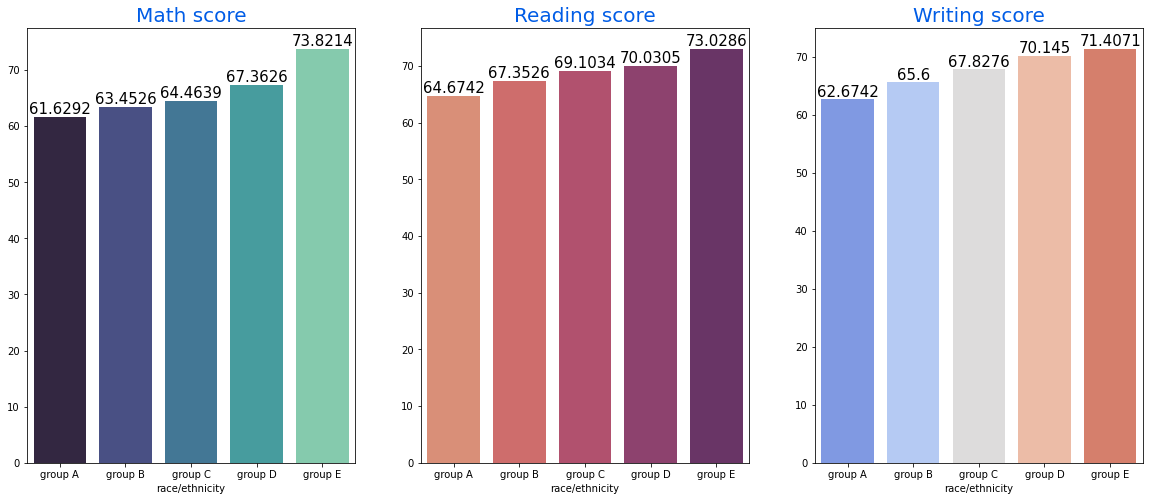

In [180]:
# race/ethnicity's impact on Student's Performance w.r.t graph viz.
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights: 
- Group E despite having less number of students, it does have highest number marks which is remarkable.
- Group A has scored the least number of marks.

### Parental Level Of Education Column

#### Does Parental Level Of Education have any impact on Student's Performance?

In [183]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [185]:
some_college_df = df[df['parental level of education'] == 'some college']
associate_degree_df = df[df['parental level of education'] == "associate's degree"]
high_school_df = df[df['parental level of education'] == 'high school']
some_high_school_df = df[df['parental level of education'] == 'some high school']
bachelor_degree_df = df[df['parental level of education'] == "bachelor's degree"]
master_degree_df = df[df['parental level of education'] == "master's degree"]

# Perform one-way ANOVA and not ttest or ptest just coz we have 6 variables
f_stat, p_value = stats.f_oneway(some_college_df['Average'], associate_degree_df['Average'], high_school_df['Average'], some_high_school_df['Average'], master_degree_df['Average'])

print('F-statistic:', f_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('Reject null hypothesis: There is a significant difference in the means of the groups.')
else:
    print('Fail to reject null hypothesis: There is no significant difference in the means of the groups.')


F-statistic: 10.469911741282612
p-value: 2.7436572354080434e-08
Reject null hypothesis: There is a significant difference in the means of the groups.


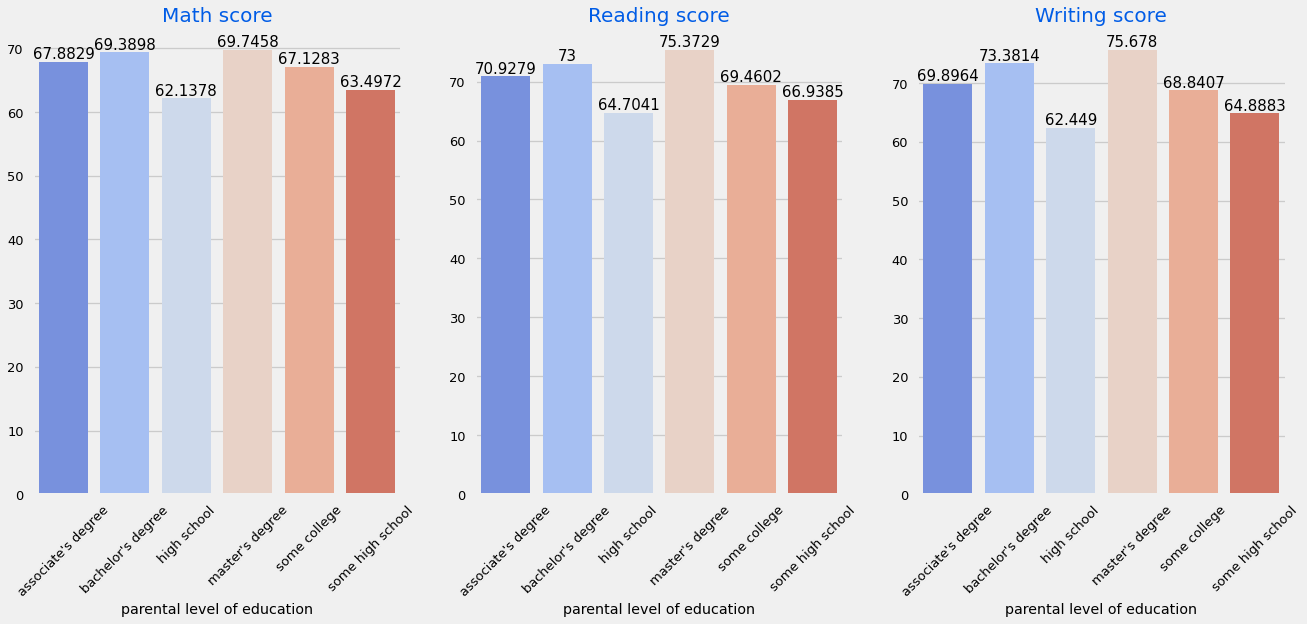

In [244]:
# parental level of education impact on Student's Performance w.r.t graph viz.

par_edu=df.groupby('parental level of education')
Group_data3=df.groupby('parental level of education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data3['math score'].mean().index,y=Group_data3['math score'].mean().values,palette = 'coolwarm',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)



for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading score'].mean().index,y=Group_data3['reading score'].mean().values,palette = 'coolwarm',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing score'].mean().index,y=Group_data3['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    

    


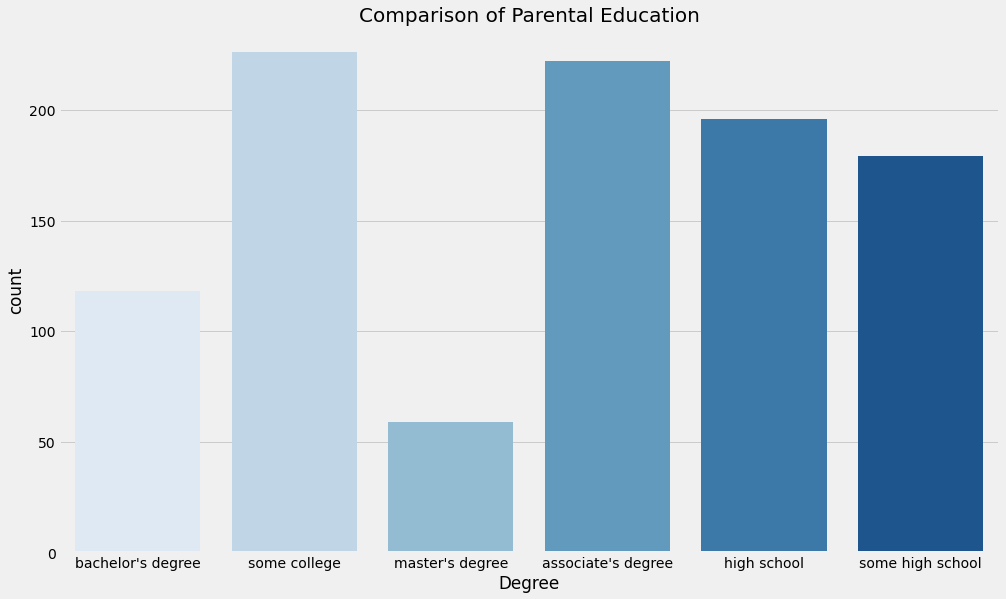

In [220]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights:
- Parent with some college degree and parents with associate's degree are more compared to others.

### Lunch Column

- Which type pf Lunch is most preferred by students? -Univariate Analysis
- What is the effect of lunch type on test results? -Bivariate Analysis

In [225]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


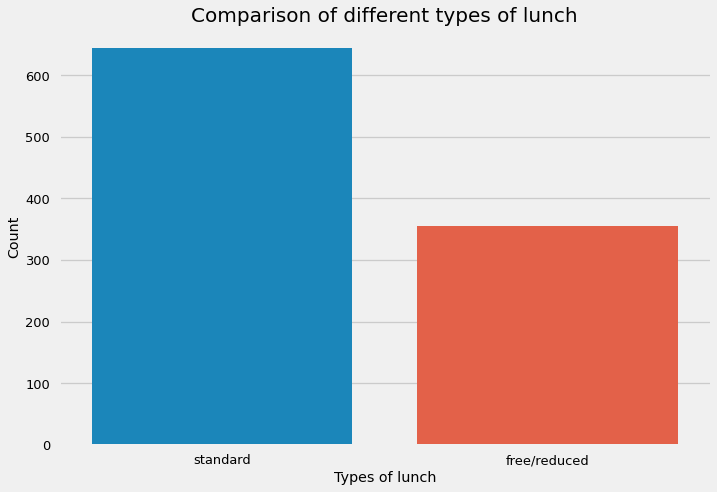

In [229]:
sns.countplot(df['lunch'])
plt.title('Comparison of different types of lunch',fontsize=20,fontweight=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

#### Insights:
- Standard lunch is most common among students.

[Text(0, 0, '44'),
 Text(0, 0, '79'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '70'),
 Text(0, 0, '61')]

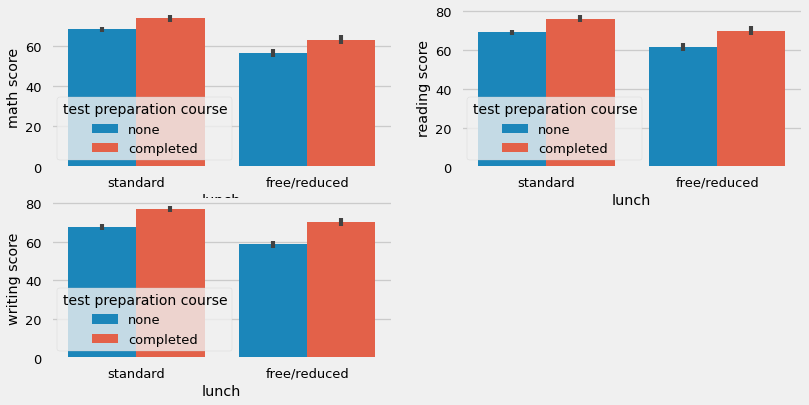

In [248]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
ax[1].bar_label(container,color='black',size=20) 

### Insights:
- Students who have completed the test preparation course and preferring Standard lunch tend to perform better!
This is Bivariate Analysis

## Checking Outliers:

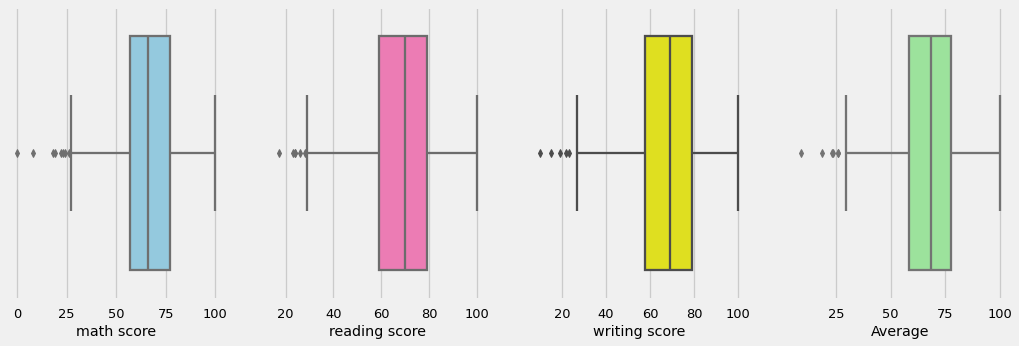

In [251]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

### We just have a couple outliers in each feature which is okay and no need to reverse engineer it

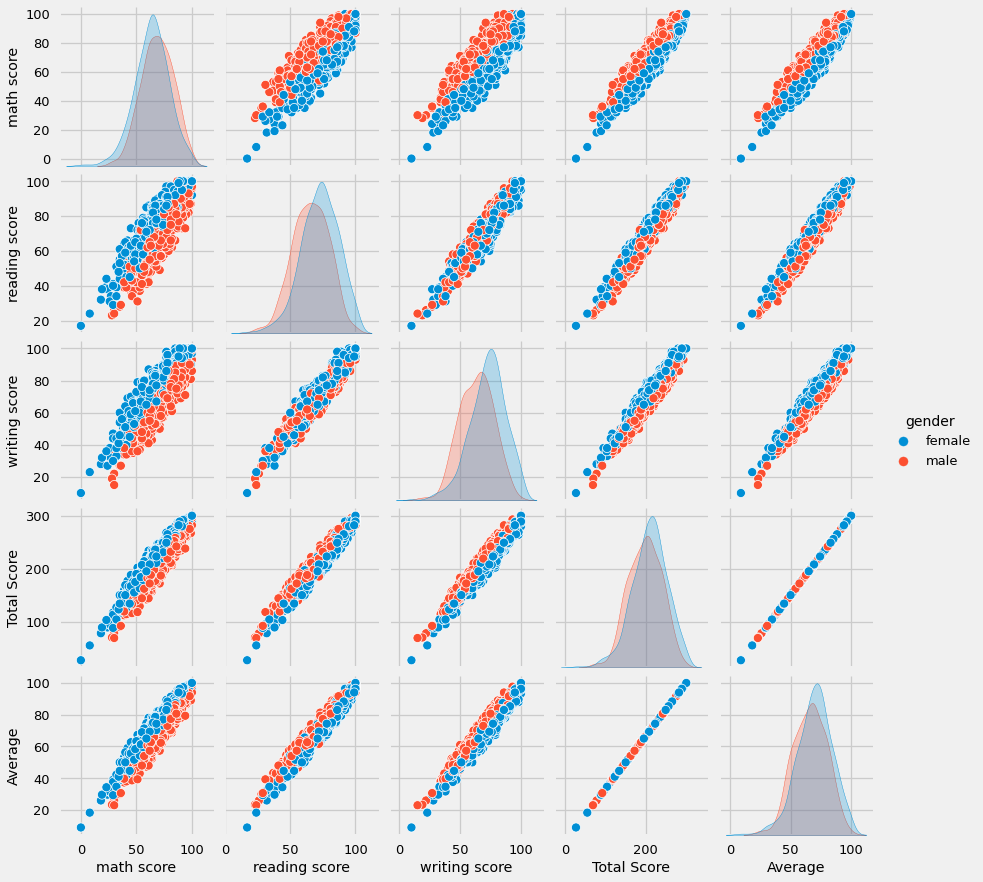

In [252]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Final Conclusions:
-Student's Performance is related with lunch, race, parental level education

-Females lead in pass percentage and also are top-scorers

-Student's Performance is not much related with test preparation course

-Finishing test preparation course is benefitial.